In [ ]:
#Titanic Survival Prediction Using Python

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
dataset=pd.read_csv("Titanic-Dataset.csv")

In [66]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoding=LabelEncoder()
dataset['Sex']=label_encoding.fit_transform(dataset['Sex'])

In [68]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [69]:
dataset.shape

(891, 12)

In [70]:
dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [72]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
#To set all the null values as 0  
dataset['Age'].fillna(dataset['Age']. mean(), inplace=True)

In [74]:
dataset['Fare'].fillna(dataset['Fare']. mean(), inplace=True)

In [75]:
dataset['Embarked'].fillna(dataset['Embarked']. mode()[0], inplace=True)

In [76]:
titanicData=dataset.drop(columns='Cabin',axis=1)

In [77]:
titanicData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
titanicData.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
titanicData['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [82]:
titanicData['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [83]:
sns.set()

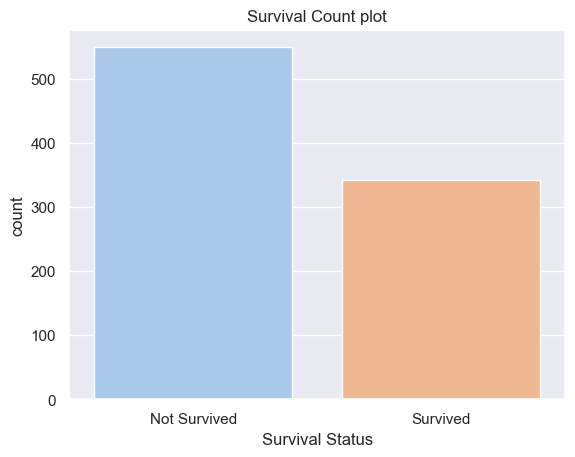

In [88]:
sns.countplot(x='Survived',data=titanicData,palette='pastel')
plt.title('Survival Count plot')
plt.xlabel('Survival Status')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

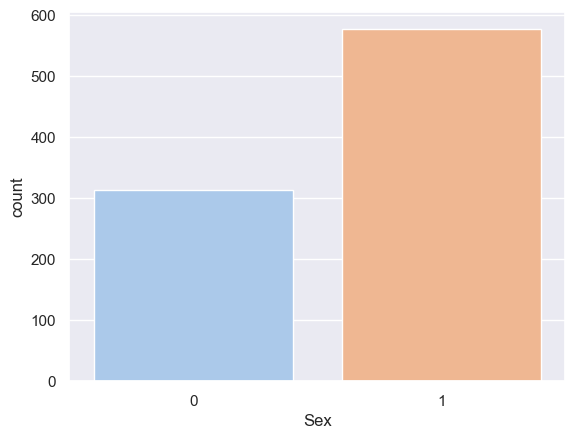

In [90]:
sns.countplot(x='Sex',data=titanicData,palette='pastel')

<Axes: xlabel='Sex', ylabel='count'>

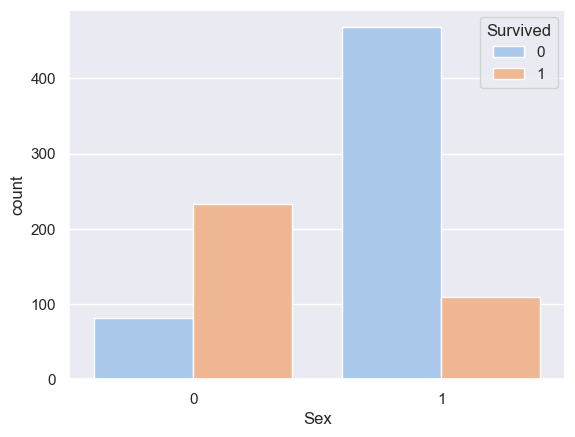

In [91]:
sns.countplot(x='Sex',data=titanicData,palette='pastel',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

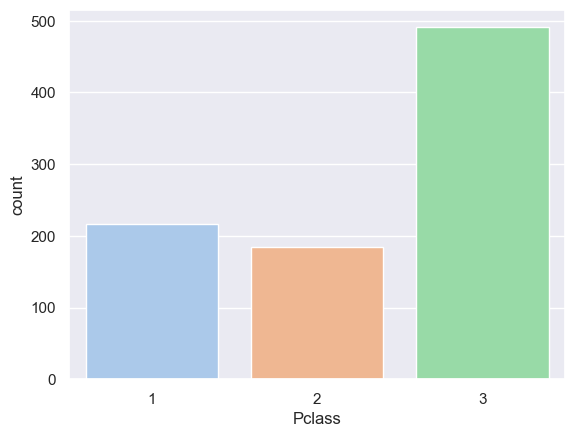

In [92]:
sns.countplot(x='Pclass',data=titanicData,palette='pastel')

<Axes: xlabel='Pclass', ylabel='count'>

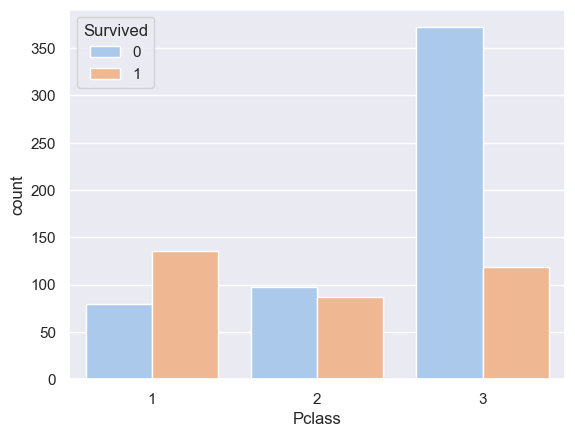

In [95]:
sns.countplot(x='Pclass',data=titanicData,palette='pastel',hue='Survived')

In [98]:
titanicData['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [99]:
titanicData['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [100]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [102]:
x=titanicData.drop(columns=['PassengerId','Survived','Name','Ticket','Embarked'],axis=1)
y=titanicData['Survived']

In [103]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare
0         3    1  22.000000      1      0   7.2500
1         1    0  38.000000      1      0  71.2833
2         3    0  26.000000      0      0   7.9250
3         1    0  35.000000      1      0  53.1000
4         3    1  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
886       2    1  27.000000      0      0  13.0000
887       1    0  19.000000      0      0  30.0000
888       3    0  29.699118      1      2  23.4500
889       1    1  26.000000      0      0  30.0000
890       3    1  32.000000      0      0   7.7500

[891 rows x 6 columns]


In [104]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2)

In [110]:
print(x.shape,x_train.shape,x_test.shape)

(891, 6) (534, 6) (357, 6)


In [111]:
model = LogisticRegression()

In [113]:
model.fit(x_train,y_train)
LogisticRegression()

LogisticRegression()

In [124]:
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 

In [126]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("Accuracy of data",training_data_accuracy)

Accuracy of data 0.8127340823970037


In [128]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]


In [132]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("Test data accuracy is ",test_data_accuracy)

Test data accuracy is  0.7955182072829131
